In [ ]:
# Did Portugal's average temperature change fall below or above the average world temperature change?

In [ ]:
# To answer this question we will cross reference the "All Countries Temperature Statistics 1970-2021" Database on
# Kaggle and a climate/weather API.

In [43]:
import requests
import pandas as pd

In [44]:
url = "https://global-warming.org/api/temperature-api"

response = requests.get(url)
response

<Response [200]>

In [45]:
type(response)

requests.models.Response

In [46]:
response.json()

{'error': None,
 'result': [{'time': '1880.04', 'station': '-0.26', 'land': '-0.18'},
  {'time': '1880.13', 'station': '-0.46', 'land': '-0.25'},
  {'time': '1880.21', 'station': '-0.32', 'land': '-0.09'},
  {'time': '1880.29', 'station': '-0.52', 'land': '-0.16'},
  {'time': '1880.38', 'station': '-0.23', 'land': '-0.10'},
  {'time': '1880.46', 'station': '-0.38', 'land': '-0.21'},
  {'time': '1880.54', 'station': '-0.33', 'land': '-0.18'},
  {'time': '1880.63', 'station': '0.23', 'land': '-0.10'},
  {'time': '1880.71', 'station': '-0.38', 'land': '-0.15'},
  {'time': '1880.79', 'station': '-0.61', 'land': '-0.23'},
  {'time': '1880.88', 'station': '-0.30', 'land': '-0.22'},
  {'time': '1880.96', 'station': '-0.28', 'land': '-0.17'},
  {'time': '1881.04', 'station': '-0.67', 'land': '-0.20'},
  {'time': '1881.13', 'station': '-0.23', 'land': '-0.14'},
  {'time': '1881.21', 'station': '-0.11', 'land': '0.03'},
  {'time': '1881.29', 'station': '-0.06', 'land': '0.05'},
  {'time': '1881.

In [47]:
new_df = pd.DataFrame(response.json())

new_df

,error,result
0,None,"{'time': '1880.04', 'station': '-0.26', 'land'..."
1,None,"{'time': '1880.13', 'station': '-0.46', 'land'..."
2,None,"{'time': '1880.21', 'station': '-0.32', 'land'..."
3,None,"{'time': '1880.29', 'station': '-0.52', 'land'..."
4,None,"{'time': '1880.38', 'station': '-0.23', 'land'..."
...,...,...
1717,None,"{'time': '2023.13', 'station': '1.26', 'land':..."
1718,None,"{'time': '2023.21', 'station': '1.42', 'land':..."
1719,None,"{'time': '2023.29', 'station': '1.26', 'land':..."
1720,None,"{'time': '2023.38', 'station': '1.11', 'land':..."


In [48]:
data_global = pd.json_normalize(response.json()["result"])

data_global

,time,station,land
0,1880.04,-0.26,-0.18
1,1880.13,-0.46,-0.25
2,1880.21,-0.32,-0.09
3,1880.29,-0.52,-0.16
4,1880.38,-0.23,-0.10
...,...,...,...
1717,2023.13,1.26,0.97
1718,2023.21,1.42,1.20
1719,2023.29,1.26,1.00
1720,2023.38,1.11,0.93


In [49]:
all_years= data_global["time"].apply(lambda x: x.split(".")[0])

In [50]:
all_years

0       1880
1       1880
2       1880
3       1880
4       1880
        ... 
1717    2023
1718    2023
1719    2023
1720    2023
1721    2023
Name: time, Length: 1722, dtype: object

In [ ]:
# CHANGE TYPE 

In [51]:
data_global["time"].dtypes

dtype('O')

In [52]:
data_global["time"] = data_global["time"].astype("float")

In [53]:
data_global["time"].dtype

dtype('float64')

In [54]:
data_global

,time,station,land
0,1880.04,-0.26,-0.18
1,1880.13,-0.46,-0.25
2,1880.21,-0.32,-0.09
3,1880.29,-0.52,-0.16
4,1880.38,-0.23,-0.10
...,...,...,...
1717,2023.13,1.26,0.97
1718,2023.21,1.42,1.20
1719,2023.29,1.26,1.00
1720,2023.38,1.11,0.93


In [55]:
column_to_filter = 'time'
row_values_to_include = ["1970", "1975", "1980", "1985", "1990", "1995", "2000", "2005", "2010", "2015", "2020"]

filtered_data_global = data_global[data_global[column_to_filter].isin(row_values_to_include)]

print(filtered_data_global)

Empty DataFrame
Columns: [time, station, land]
Index: []


In [56]:
import pandas as pd
import numpy as np

In [57]:
data = pd.read_csv("global_temp.csv")

data

,ObjectId,Country Name,Unit,Change,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,"Afghanistan, Islamic Rep. of",Degree Celsius,Surface Temperature Change,0.898,0.652,-1.089,0.262,-0.470,-0.468,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,2,Albania,Degree Celsius,Surface Temperature Change,-0.119,-0.200,-0.077,-0.299,-0.134,-0.203,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,3,Algeria,Degree Celsius,Surface Temperature Change,0.114,-0.380,-0.342,-0.028,-0.502,-0.554,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,4,American Samoa,Degree Celsius,Surface Temperature Change,-0.036,-0.473,-0.070,0.322,-0.317,-0.128,...,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
4,5,"Andorra, Principality of",Degree Celsius,Surface Temperature Change,0.081,-0.355,-0.526,-0.010,-0.412,0.207,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,Western Sahara,Degree Celsius,Surface Temperature Change,0.547,-0.620,-1.104,-0.013,-0.600,-0.267,...,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
223,224,World,Degree Celsius,Surface Temperature Change,0.153,-0.089,-0.193,0.271,-0.179,0.091,...,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
224,225,"Yemen, Rep. of",Degree Celsius,Surface Temperature Change,0.388,-0.199,0.049,0.333,-0.108,0.031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,226,Zambia,Degree Celsius,Surface Temperature Change,0.354,-0.249,-0.146,0.386,-0.393,-0.116,...,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295,1.252,1.002


In [58]:
data[data["Country Name"]=="Portugal"]

,ObjectId,Country Name,Unit,Change,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
162,163,Portugal,Degree Celsius,Surface Temperature Change,0.057,-0.879,-0.913,-0.075,-0.448,-0.096,...,0.767,0.905,1.308,1.362,1.677,2.115,0.863,1.25,1.95,1.213


In [59]:
selected_years = data[["Country Name", "Unit", "1970", "1975", "1980", "1985", "1990", "1995", "2000", "2005", "2010", "2015", "2020"]]

pd.DataFrame(selected_years)

selected_years[selected_years["Country Name"]=="Portugal"]

,Country Name,Unit,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
162,Portugal,Degree Celsius,0.057,-0.096,0.284,0.534,1.405,1.648,0.613,0.941,1.094,1.362,1.95


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


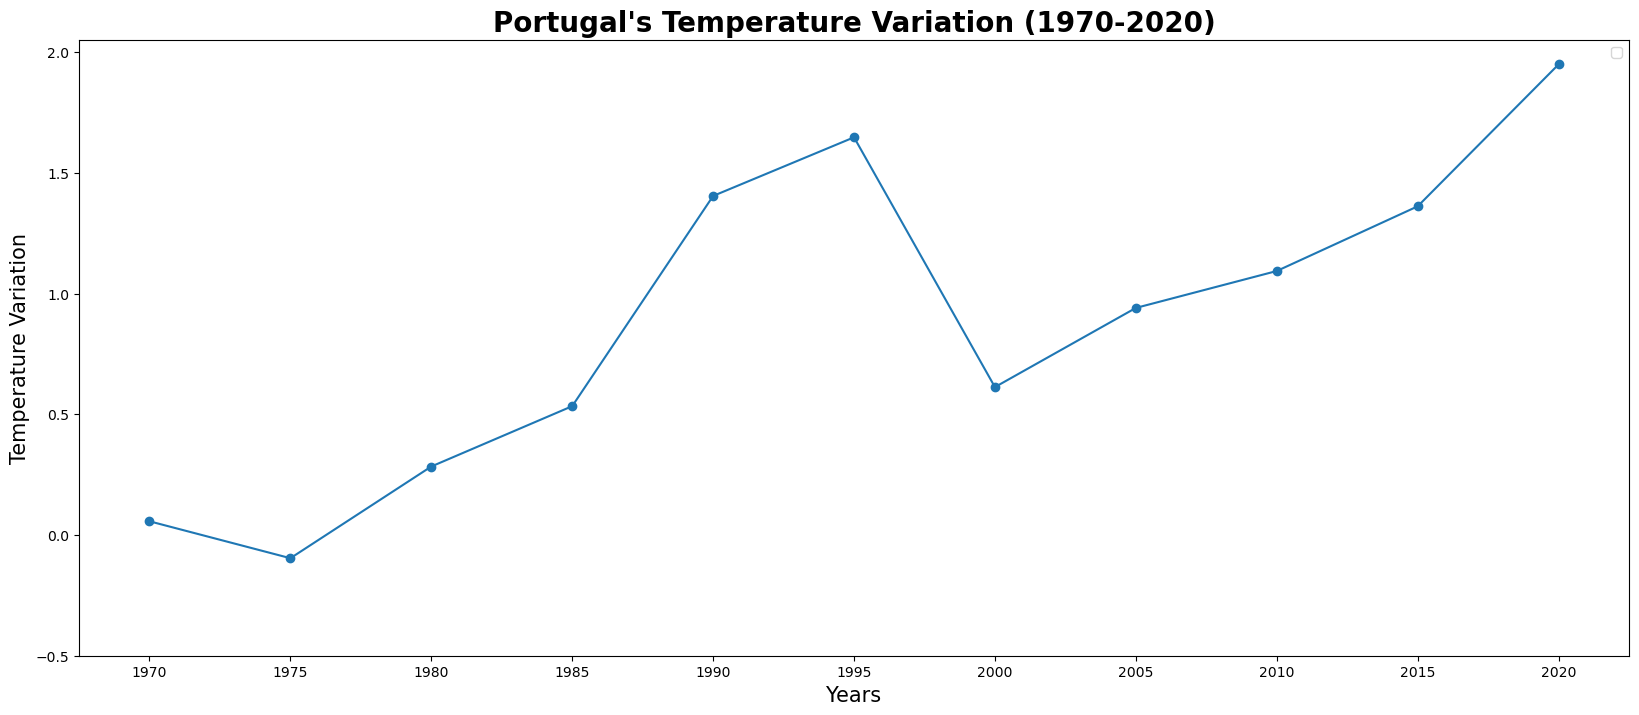

In [87]:
plt.figure(figsize=(20,8))
plt.plot([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],[0.057, -0.096, 0.284, 0.534, 1.405, 1.648, 0.613, 0.941, 1.094, 1.362, 1.95], "o-")

plt.title("Portugal's Temperature Variation (1970-2020)", size=20, fontweight="bold")

plt.ylabel("Temperature Variation", size=15)
plt.xlabel("Years", size=15)

plt.xticks(np.arange(1970,2025,5))
plt.yticks(np.arange(-0.5,2.5,0.5))

plt.legend()

plt.savefig("PortugalTemp.png")

plt.show()